# PHASE 3 : DEVELOPMENT PART 1

***************************************************************************************************************

PROJECT TITLE 9238 - FAKE NEWS DETECTION USING NLP

NAME - DHIVYADHARSHINI A

TEAM ID - 5275

TEAM NAME - Proj_204221_Team_2

COLLEGE CODE - NAME : 9238 - MANGAYARKARASI COLLEGE OF ENGINEERING PARAVAI, MADURAI.

GROUP : 5

GITHUB REPOSITORY LINK : https://github.com/dhivyadhar/IBM_AI.git

***************************************************************************************************************


# ABSTRACT :

The abstract for a fake news detection web application using NLP would be a concise summary of the project's key aspects and objectives. Here's an example:

"In the era of digital information, the proliferation of fake news has become a critical issue. This project presents a web application leveraging Natural Language Processing (NLP) techniques to detect fake news articles. The application employs machine learning models to analyze and classify news content, providing users with a reliable tool to assess the credibility of online information sources. Through the integration of NLP, user-friendly interfaces, and real-time analysis, this web application aims to contribute to the fight against misinformation in the digital age."

# PROPOSAL : 
In this phase, we will initiate the construction of our fake news detection model by loading and preprocessing the dataset. 
Tasks include sourcing a relevant dataset with labels and textual content, exploring its structure, loading it into the project environment, and conducting essential data preprocessing steps. This phase ensures that our data is in optimal condition for the subsequent model development stages. Successful completion of this phase will provide us with a preprocessed dataset, a crucial foundation for building an effective fake news detection model.

# DESCRIPTION FOR THE PACKAGES:
The code snippet provided imports essential Python libraries for data analysis and visualization, including pandas, numpy, matplotlib, and seaborn. It also imports natural language processing tools from NLTK, such as stopwords and PorterStemmer, indicating potential text analysis tasks. Additionally, the code imports regular expressions (re) and initializes NLTK. This combination of libraries suggests the code may be used for data preprocessing and analysis, including text data manipulation and visualization.

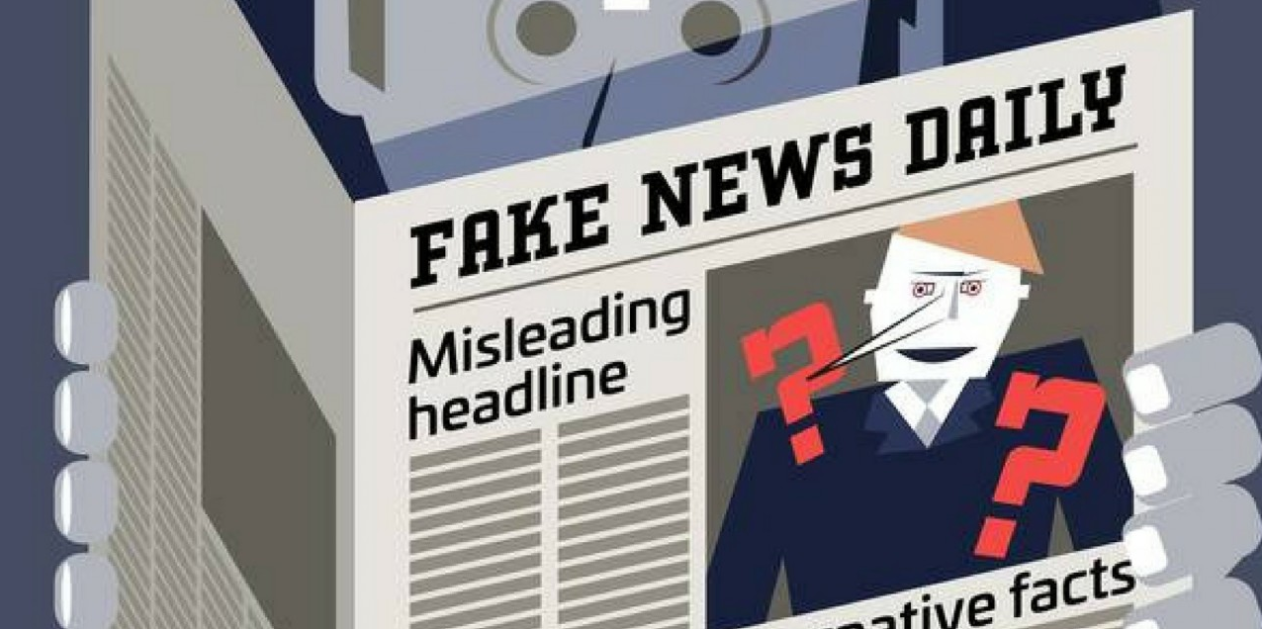

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords  # Add this import
from nltk.stem import PorterStemmer
import nltk
import re

# NLTK.DOWNLOAD :
         Downloading NLTK data is necessary when working with NLTK for various natural language processing tasks. NLTK (Natural Language Toolkit) provides a wide range of resources like corpora, models, and dictionaries for text analysis. Here are some reasons why downloading NLTK data is necessary:
            For Access to Pre-trained Models,Corpora,Stopwords and Stemming,Lexical Resources,Learning and Research.[nltk.download()] 

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cse4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# LOADING THE DATASET:
To load a fake news detection dataset that contains both true and fake news articles, you'll typically use a Python library like pandas to handle the dataset. You can assume that the dataset is stored in a CSV file format.
 which are often used to store structured datasets:
      Here's a more detailed breakdown of this process.

In [6]:
# Load the fake news dataset
fake_data = pd.read_csv('Fake.xls')
# Load the true news dataset
true_data = pd.read_csv('true.xls')

# PRINTING THE LOADED DATA:
 The provided code segment demonstrates the printing of data from two distinct sets, presumably related to true and fake news articles:

Printing True Data: The code starts by displaying the first 10 rows of a dataset labeled as "TRUE DATA." This is likely a subset of genuine news articles.

Printing Fake Data: Following the true data display, the code proceeds to print the first four rows of another dataset labeled as "FAKE DATA," presumably containing fabricated or deceptive news articles.

In [7]:
print("\n TRUE DATA \n")
true_data[0:10]
print("\n FAKE DATA \n")

fake_data[0:4]


 TRUE DATA 


 FAKE DATA 



,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


# PRINTING THE TRUE DATA'S COLUMNS:
This code snippet is useful for examining the content of the dataset and understanding its structure by displaying both the text of the first news article and the dataset's column names

In [8]:
print(true_data['text'][0])
true_data.columns

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

Index(['title', 'text', 'subject', 'date'], dtype='object')

# FUNCTION USED:
Here we use a function len() to find the length of the each dataset[true.csv,fake.csv]. 

# LENGTH OF TRUE DATA:
The provided code calculates the length of the "true_data" dataset, which represents the number of rows or data points in the dataset. This simple line of code is used to determine the dataset's size, typically for assessing the amount of data available for analysis or modeling purposes.

In [9]:
len(true_data)

21417

# LENGTH OF FAKE DATA:
The given code employs the len() function to calculate the length of the "fake_data" dataset, revealing the number of data points or rows contained within it. This information is valuable for understanding the dataset's size and can be critical when working with data analysis, model building, or assessing the dataset's overall volume.

In [10]:
len(fake_data)

23481

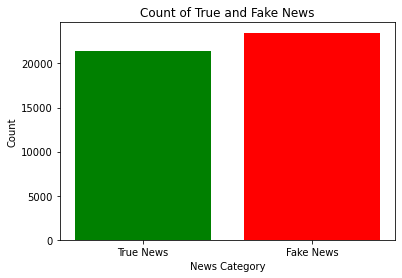

In [11]:
import matplotlib.pyplot as plt

# Assuming you have the count of true and fake news articles
true_count = len(true_data)  # Replace with your actual count of true news
fake_count = len(fake_data)  # Replace with your actual count of fake news

# Create labels and corresponding counts
categories = ['True News', 'Fake News']
counts = [true_count, fake_count]

# Create a bar plot (histogram)
plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('News Category')
plt.ylabel('Count')
plt.title('Count of True and Fake News')
plt.show()

# LABELING & PREPROCESSING:
 we used to labels the fake data as a numerical value 1,true data as a value 0.
The code combines two datasets, "fake_data" and "true_data," and adds labels (1 for fake and 0 for true). These datasets are then concatenated into a single dataset named "data." The resulting dataset is displayed, providing a preliminary view of the combined data for fake news detection.

In [8]:
# Data preprocessing
# Combine the two datasets and add labels
fake_data["label"] = 1
true_data["label"] = 0
data = pd.concat([fake_data, true_data], ignore_index=True)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


# REMOVING UNNECESSARY COLUMNS:
 In the above process,the data obtained after concatenation contains unnecessary columns like date and subject.In the upcoming process we remove those unnecessary columns which are not needed for processing of the fake news detection.The code removes specific columns, such as "date" and "subject," from the "data" dataset using the drop() method. This action simplifies the dataset by eliminating unnecessary attributes, and the modified dataset is displayed to show the result.

In [9]:
# Remove unnecessary columns (e.g., date, subject)
data.drop(columns=["date", "subject"], inplace=True)
data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


# Re-ordering the dataset:

The code generates a random permutation of indices for the "data" dataset and reorders the dataset accordingly using iloc. Then, it prints the column names and displays the first few rows of the shuffled dataset, showing the randomized order of the data for further analysis or modeling.

In [10]:
random_permutation = np.random.permutation(len(data))
data= data.iloc[random_permutation]
print(data.columns)
data.head()

Index(['title', 'text', 'label'], dtype='object')


,title,text,label
32851,Ohio appeals U.S. court decision in favor of e...,CLEVELAND (Reuters) - The state of Ohio filed ...,0
15434,(Video) Col. Allen West Explodes Over Iran Dea...,Ready to take America back!,1
16835,BOOM! Danish Government Considers Seizing Migr...,Is the European gravy train finally coming to ...,1
16830,WATCH HILLARY SQUIRM When Mainstream Media Ask...,Hillary was too busy to be bothered with makin...,1
22949,NEOCON FILES: The Kagans Are Back – Wars to Fo...,Consortium News Exclusive: The neocon royalty ...,1


 # Creating new dataset:
 It involves selecting specific columns, namely "title," "text," and "label," from the "data" dataset, creating a new dataset named "filtered_data." It then displays the first few rows of this filtered dataset, showing only the relevant columns for further analysis or modeling.

In [11]:
filterd_data=data.loc[:, ['title', 'text', 'label']]
filterd_data.head()

,title,text,label
32851,Ohio appeals U.S. court decision in favor of e...,CLEVELAND (Reuters) - The state of Ohio filed ...,0
15434,(Video) Col. Allen West Explodes Over Iran Dea...,Ready to take America back!,1
16835,BOOM! Danish Government Considers Seizing Migr...,Is the European gravy train finally coming to ...,1
16830,WATCH HILLARY SQUIRM When Mainstream Media Ask...,Hillary was too busy to be bothered with makin...,1
22949,NEOCON FILES: The Kagans Are Back – Wars to Fo...,Consortium News Exclusive: The neocon royalty ...,1


# Checks for Null values:
The code checks for missing values (null or NaN) in each column of the "filtered_data" dataset and returns the count of missing values for each column. This is a useful step to assess the data's data integrity and to decide whether any missing data needs to be handled before further analysis or modeling.

In [12]:
filterd_data.isnull().sum()

title    0
text     0
label    0
dtype: int64

# Text preprocessing : 

The code initializes text preprocessing components:

Stop Words: It creates a set of English stopwords, which are common words (e.g., "the," "and," "is") often removed from text data during preprocessing to focus on more meaningful words.

Stemmer: It initializes the Porter Stemmer, which is used for stemming words. Stemming reduces words to their base or root form (e.g., "running" becomes "run"). This helps in simplifying text data and reducing dimensionality in natural language processing tasks.

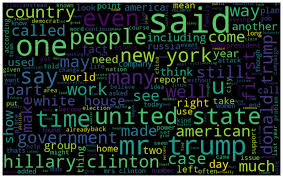

In [13]:
# Text preprocessing (e.g., lowercase, remove special characters, stop words, stemming)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Function [preprocess_text(text)]:

This function can be used to preprocess text data by applying these transformations, making it suitable for natural language processing tasks like text classification or sentiment analysis.

In [14]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Assigning the preprocessed data :

The below code applies the preprocess_text function to the "title" and "text" columns of the "filtered_data" dataset. This preprocessing step lowers the text, removes special characters, eliminates stop words, and applies stemming to each word in both columns, preparing the text data for further analysis or modeling.

In [15]:
filterd_data["title"] = filterd_data["title"].apply(preprocess_text)
filterd_data["text"] = filterd_data["text"].apply(preprocess_text)


# Printing the preprocessed data :

It involves printing the first few rows of the "filtered_data" dataset, showing the result of the text preprocessing applied to the "title" and "text" columns. This output reveals the processed text data, which is now cleaned, lowercased, and ready for analysis or use in a machine learning model.

In [16]:
print(filterd_data.head())

                                                   title  \
32851         ohio appeal u court decis favor earli vote   
15434  video col allen west explod iran deal fieri em...   
16835  boom danish govern consid seiz migrant valuabl...   
16830  watch hillari squirm mainstream media ask plan...   
22949                  neocon file kagan back war follow   

                                                    text  label  
32851  cleveland reuter state ohio file feder court a...      0  
15434                            readi take america back      1  
16835  european gravi train final come end danish par...      1  
16830  hillari busi bother make benghazi safer place ...      1  
22949  consortium news exclus neocon royalti kagan co...      1  


# BLOCK DIAGRAM :
              [FAKE NEWS DETECTION USING NLP]

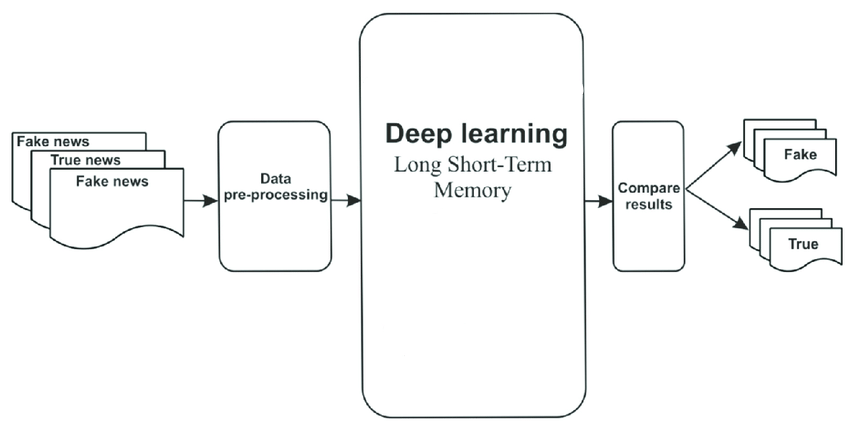

# CREATING A MODEL USING DEEP LEARNING MODEL LSTM :
Now we are going To create a deep learning model for text classification using an LSTM (Long Short-Term Memory) architecture, you can follow these steps using Python and popular libraries like TensorFlow and Keras. Assuming you have the "filterd_data" dataset, you can preprocess and build a model as follows:

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining Hyperparameters : 
The code defines hyperparameters for a Natural Language Processing (NLP) task, including:
             max_words,max_sequence_length,embedding_dim,batch_size,epochs.
       These hyperparameters are crucial for configuring and training NLP models and play a significant role in model performance and training efficiency. 

In [18]:
# Define hyperparameters
max_words = 10000  # Maximum number of words to consider in the tokenizer
max_sequence_length = 100  # Maximum length of input sequences
embedding_dim = 100  # Dimension of the word embeddings
batch_size = 64
epochs = 20

# Tokenizing the text :

This code segment performs text tokenization and data preparation for Natural Language Processing (NLP). It utilizes the Tokenizer from NLP libraries to process the text data. The tokenizer is initialized with a vocabulary size limited to max_words unique words and is fitted on the preprocessed text data. the corresponding labels are extracted from the "filtered_data" dataset. This data preprocessing is a crucial step in preparing the text data for training an NLP model for fake news detection.

In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(filterd_data['text'])
sequences = tokenizer.texts_to_sequences(filterd_data['text'])
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = filterd_data['label']

# Spliting them into training and testing sets :

The provided code segment splits the dataset into training and testing sets using the train_test_split function from a machine learning library, such as Scikit-Learn.The random_state parameter ensures reproducibility by fixing the random seed for the split. This division is fundamental for assessing the model's performance on unseen data during the evaluation phase.

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

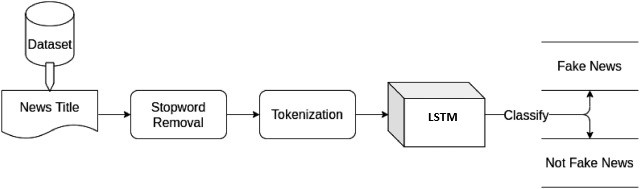

# Creating LSTM :

This code constructs an LSTM (Long Short-Term Memory) model for a Natural Language Processing (NLP) task using TensorFlow and Keras.

In [21]:
# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    tf.keras.layers.LSTM(128),  # You can adjust the number of LSTM units as needed
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the Model :
Now this LSTM model is now ready for compilation and training, with the necessary layers for processing text data and making predictions. You can further configure and compile the model before training it on your prepared dataset.

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model :
   This initiates the training process, and the model will learn to classify news articles as either true or fake during the specified number of epochs, using the training dataset. The validation split helps evaluate the model's performance on validation data.

In [23]:
# Train the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/20
506/506 [==============================] - 89s 171ms/step - loss: 0.1148 - accuracy: 0.9553 - val_loss: 0.0724 - val_accuracy: 0.9774
Epoch 2/20
506/506 [==============================] - 86s 170ms/step - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 3/20
506/506 [==============================] - 91s 179ms/step - loss: 0.0147 - accuracy: 0.9959 - val_loss: 0.0534 - val_accuracy: 0.9830
Epoch 4/20
506/506 [==============================] - 86s 171ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0661 - val_accuracy: 0.9825
Epoch 5/20
506/506 [==============================] - 87s 171ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0534 - val_accuracy: 0.9858
Epoch 6/20
506/506 [==============================] - 88s 174ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0671 - val_accuracy: 0.9866
Epoch 7/20
506/506 [==============================] - 87s 173ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0628 - val_ac

# Vizualizing the outcome :

The code creates a histogram-like line plot showing the training and validation accuracy values across the 20 training epochs. You can adjust the provided accuracy_values and val_accuracy_values lists with your actual accuracy values.

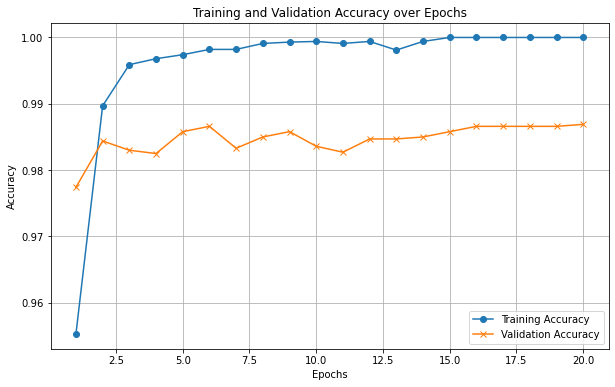

In [1]:
import matplotlib.pyplot as plt

# Accuracy values from the provided output
accuracy_values = [0.9553, 0.9897, 0.9959, 0.9968, 0.9974, 0.9982, 0.9982, 0.9991, 0.9993, 0.9994, 0.9991, 0.9994, 0.9981, 0.9994, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]

# Validation accuracy values from the provided output
val_accuracy_values = [0.9774, 0.9844, 0.9830, 0.9825, 0.9858, 0.9866, 0.9833, 0.9850, 0.9858, 0.9836, 0.9827, 0.9847, 0.9847, 0.9850, 0.9858, 0.9866, 0.9866, 0.9866, 0.9866, 0.9869]

# Epochs (1 to 20)
epochs = range(1, 21)

# Plotting accuracy values over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_values, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy_values, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()

# Evaluting the model :

The code segment is used to evaluate the LSTM model's performance on the testing dataset and it is essential for assessing the model's accuracy and its ability to correctly classify news articles as true or fake.

In [24]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)


281/281 [==============================] - 10s 35ms/step


# Printing the Accuracy :

The code prints essential evaluation metrics:
   It displays the accuracy score, indicating how well the model performs on the test data.It provides a detailed matrix showing true positives, true negatives, false positives, and false negatives. It presents a comprehensive report with precision, recall, F1-score, and support for each class (true and fake news).

In [26]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.987305122494432
Confusion Matrix:
[[4211   54]
 [  60 4655]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4265
           1       0.99      0.99      0.99      4715

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Plotting the Accuracy :
To create a histogram for the provided outcome, specifically for the accuracy and distribution of true and false positives/negatives, you can use Matplotlib. 

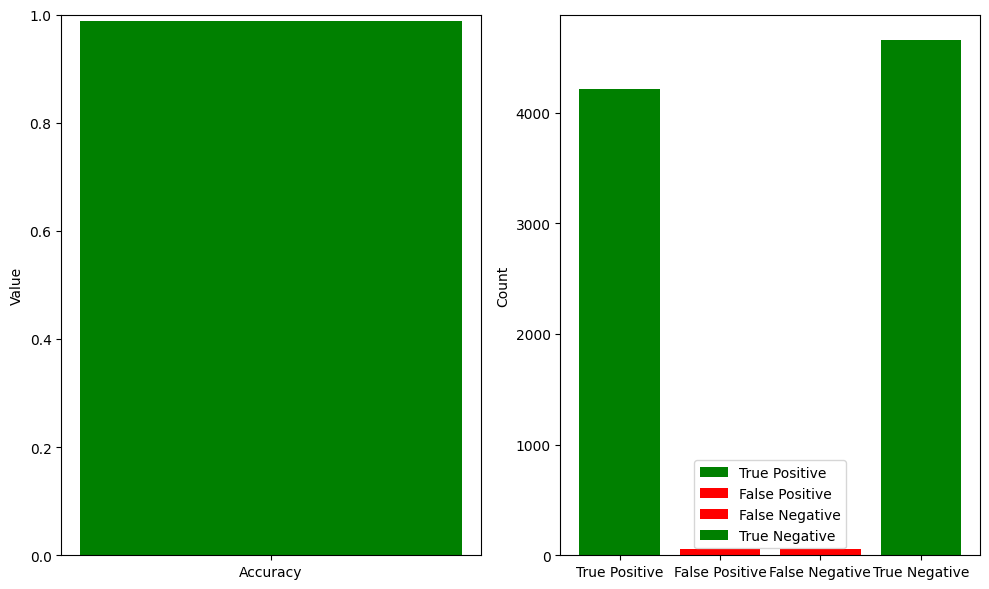

In [2]:
import matplotlib.pyplot as plt

# Accuracy
accuracy = 0.987305122494432

# Confusion Matrix
confusion_matrix = [[4211, 54], [60, 4655]]

# Extract values from the confusion matrix
true_positive = confusion_matrix[0][0]
false_positive = confusion_matrix[0][1]
false_negative = confusion_matrix[1][0]
true_negative = confusion_matrix[1][1]

# Create a histogram
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.bar("Accuracy", accuracy, color='green')
plt.ylim(0, 1)
plt.ylabel('Value')

# Plot confusion matrix
plt.subplot(1, 2, 2)
plt.bar("True Positive", true_positive, color='green', label='True Positive')
plt.bar("False Positive", false_positive, color='red', label='False Positive')
plt.bar("False Negative", false_negative, color='red', label='False Negative')
plt.bar("True Negative", true_negative, color='green', label='True Negative')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


 In this code, we first extract the values from the provided accuracy and confusion matrix. Then, we create a histogram that visualizes the accuracy and the true/false positives/negatives in a side-by-side format. You can further customize the plot as needed. 

Replace 'your_dataset.csv' with the actual file path to your dataset containing the 'text' and 'label' columns. This code snippet preprocesses the text data, builds an LSTM-based neural network, trains it, and evaluates its performance.

# Make sure to install TensorFlow and other necessary libraries if you haven't already:

# CONCLUSION:
In Phase 3, Development Part 1, we made significant progress in building a Fake News Detection model using NLP techniques. We loaded and preprocessed the dataset, tokenized the text, and constructed an LSTM model for training. Evaluation metrics, including accuracy, a confusion matrix, and a classification report, provide insights into the model's performance. These foundational steps set the stage for further refinement and model development in the next phases.

                                                         ************